In [1]:
import numpy as np
import math
import cv2 as cv
import matplotlib.pyplot as plt

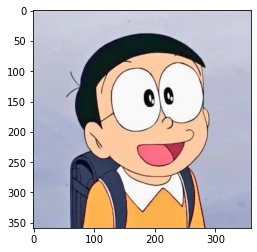

In [32]:
img = plt.imread("nobita.jpg")
plt.imshow(img)

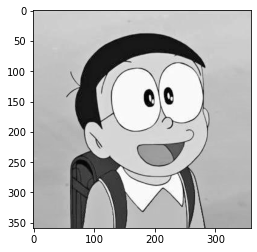

In [61]:
grayScale = cv.imread("nobita.jpg",0)
plt.imshow(grayScale,cmap="gray")

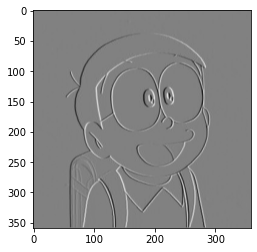

In [62]:

kernel=[
    [-1/3,0,1/3],
    [-1/3,0,1/3],
    [-1/3,0,1/3]
]
sum=0

fx = np.zeros((grayScale.shape[0], grayScale.shape[1]), dtype = int)
for i in range(1,grayScale.shape[0]-1):
    for j in range(1,grayScale.shape[1]-1): 
        sum=0
        x = i - 1
        for k in range(0,3):
            y = j - 1
            for l in range(0,3):
                sum = sum + (kernel[k][l] * grayScale[x][y])
                y = y + 1
            x = x + 1
        fx[i][j] = sum
plt.imshow(fx,cmap="gray")


In [63]:
print(fx)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... -1  0  0]
 [ 0  0  0 ... -1  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [64]:
fx=np.clip(fx,0,255)
print(fx)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


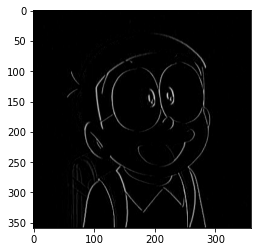

In [65]:
plt.imshow(fx,cmap="gray")

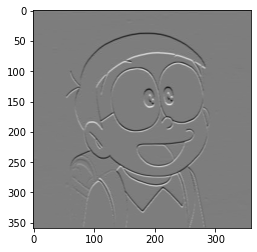

In [66]:
kernel=[
    [-1/3,-1/3,-1/3],
    [0,0,0],
    [1/3,1/3,1/3]
]
sum=0

fy = np.zeros((img.shape[0], img.shape[1]), dtype = int)
for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        sum=0
        x = i - 1
        for k in range(0,3):
            y = j - 1
            for l in range(0,3):
                sum = sum + (kernel[k][l] * grayScale[x][y])
                y = y + 1
            x = x + 1
        fy[i][j] = sum

plt.imshow(fy,cmap="gray")


In [67]:
print(fy)

[[ 0  0  0 ...  0  0  0]
 [ 0 28 28 ... 14 15  0]
 [ 0  0  1 ...  4  4  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


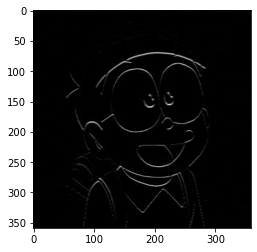

In [68]:
fy=np.clip(fy,0,255)
plt.imshow(fy,cmap="gray")

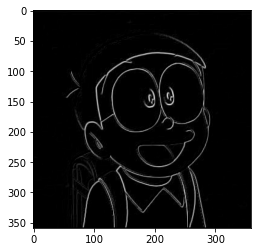

In [78]:
edgedImage = np.zeros((img.shape[0], img.shape[1]), dtype = int)
for i in range (0,img.shape[0]):
    for j in range (0,img.shape[1]):
        edgedImage[i][j] = math.sqrt((fx[i][j]**2)+(fy[i][j]**2))
        
plt.imshow(edgedImage,cmap="gray")

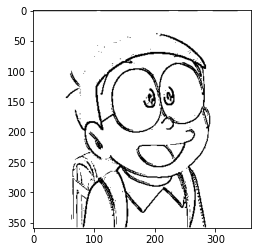

In [79]:
thresholdImg = np.zeros((edgedImage.shape[0], edgedImage.shape[1]), dtype = int)
for i in range(edgedImage.shape[0]):
    for j in range(edgedImage.shape[1]):
        if(edgedImage[i,j] >= 20):
            thresholdImg[i,j] = 0
        else:
            thresholdImg[i,j]=255
plt.imshow(thresholdImg,cmap="gray")

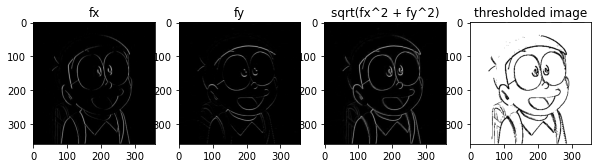

In [80]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(141)
plt.title("fx")
plt.imshow(fx,cmap="gray")

fig.add_subplot(142)
plt.title("fy")
plt.imshow(fy,cmap="gray")

fig.add_subplot(143)
plt.title("sqrt(fx^2 + fy^2)")
plt.imshow(edgedImage,cmap="gray")

fig.add_subplot(144)
plt.title("thresholded image")
plt.imshow(thresholdImg,cmap="gray")